Author: Shan Qu, Delft University of Technology

First created: 3 April 2021

Product: explore and prepare the credit data

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
pd.set_option('display.max_columns', 20)


## 1. Explore the data 


###1.1 Display info of the data

In [2]:
df_data = pd.read_csv('german_credit_data.csv')
print(df_data.info())
N_data = len(df_data)
print(df_data.columns)

# drop the unnamed ID column
df_data.drop('Unnamed: 0', axis=1, inplace=True)
# Job is categorical, not numerical 
# 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled
df_data['Job'] = df_data['Job'].replace({0: 'unskilled and non-resident', 1: 'unskilled and resident', 2: 'skilled', 3: 'highly skilled'})
print(df_data.info())
df_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB
None
Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 9

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,skilled,own,NaN,little,1169,6,radio/TV,good
1,22,female,skilled,own,little,moderate,5951,48,radio/TV,bad
2,49,male,unskilled and resident,own,little,NaN,2096,12,education,good
3,45,male,skilled,free,little,little,7882,42,furniture/equipment,good
4,53,male,skilled,free,little,little,4870,24,car,bad


###1.2 Replace the missing data
Only categorical variables 'Saving accounts' and 'Checking account' have null.

Replace them using 'Other'

In [3]:
# Print columns with null
print(df_data.columns[df_data.isnull().any()])

print(df_data['Saving accounts'].isnull().sum())
print(df_data[df_data['Saving accounts'].isnull()].head())
print(df_data['Checking account'].isnull().sum())
print(df_data[df_data['Checking account'].isnull()].head())

# replace null with 'Other' for categorical variables
df_data['Saving accounts'].fillna('Other', inplace=True)
df_data['Checking account'].fillna('Other', inplace=True)

print(df_data.columns[df_data.isnull().any()])

Index(['Saving accounts', 'Checking account'], dtype='object')
183
    Age   Sex                     Job Housing Saving accounts  \
0    67  male                 skilled     own             NaN   
5    35  male  unskilled and resident    free             NaN   
16   53  male                 skilled     own             NaN   
17   25  male                 skilled     own             NaN   
24   26  male                 skilled     own             NaN   

   Checking account  Credit amount  Duration              Purpose  Risk  
0            little           1169         6             radio/TV  good  
5               NaN           9055        36            education  good  
16              NaN           2424        24             radio/TV  good  
17           little           8072        30             business  good  
24              NaN           2069        10  furniture/equipment  good  
394
    Age   Sex                     Job Housing Saving accounts  \
2    49  male  unskilled and 

### 1.3 Find outliers
Age, Job, Duration, Credit amount can have outliers.

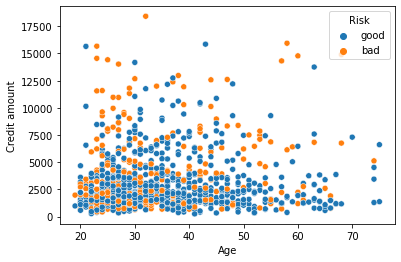

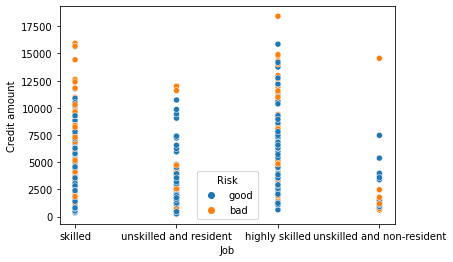

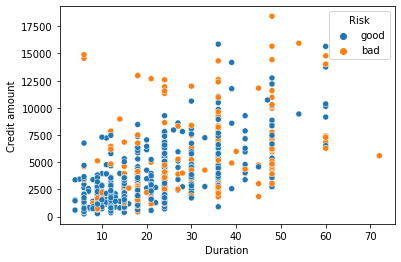

There is no obvious outliers


In [4]:
# Create the scatter plot for age and credit amount
sns.scatterplot(x='Age', y='Credit amount', data=df_data, hue='Risk').set(xlabel='Age', ylabel='Credit amount')
plt.show()

# Create the scatter plot for job and credit amount
sns.scatterplot(x='Job', y='Credit amount', data=df_data, hue='Risk').set(xlabel='Job', ylabel='Credit amount')
plt.show()

# Create the scatter plot for duration and credit amount
sns.scatterplot(x='Duration', y='Credit amount', data=df_data, hue='Risk').set(xlabel='Duration', ylabel='Credit amount')
plt.show()

print("There is no obvious outliers")

### 1.4 Observe the data more

**univariate variables:**

quantitative ones: distribution plot

qualitative ones: histogram plot

**multivariate variables:**

quantitative ones: violin plot grouped by Risk

qualitative ones: histogram plot grouped by Risk


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


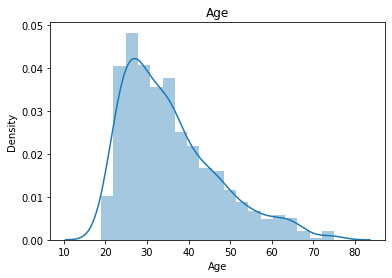

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


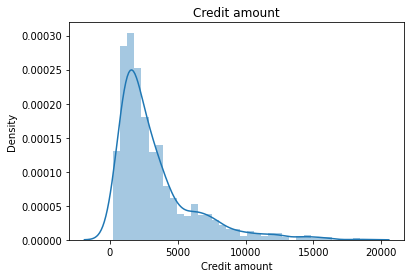

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


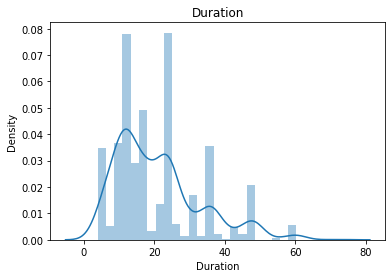

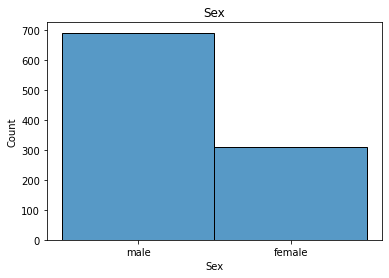

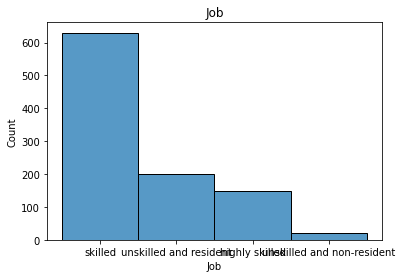

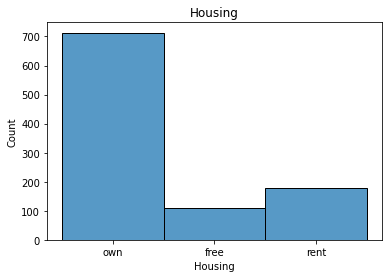

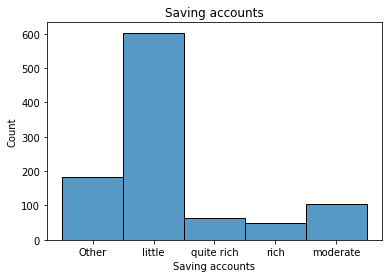

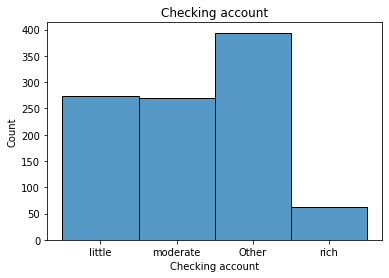

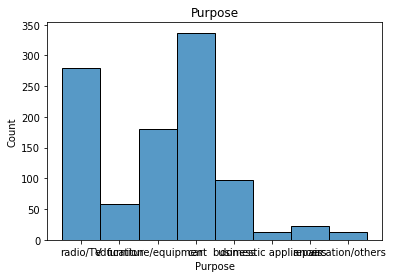

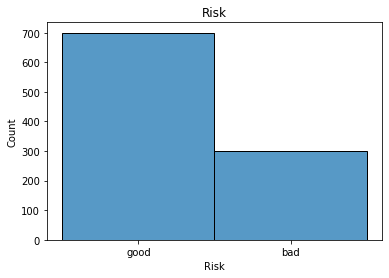

In [5]:
df_data.describe()
# Create two data sets for quantitative and qualitative data
df_data_quantitative = df_data.select_dtypes(exclude=['object'])
df_data_qualitative = df_data.select_dtypes(include=['object'])

# univariate plot
for col in df_data_quantitative:
  sns.distplot(df_data_quantitative[col]).set_title(col)
  plt.show()

for col in df_data_qualitative:
  sns.histplot(df_data_qualitative[col]).set_title(col)
  plt.show()

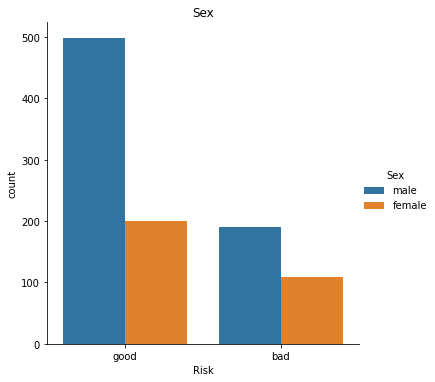

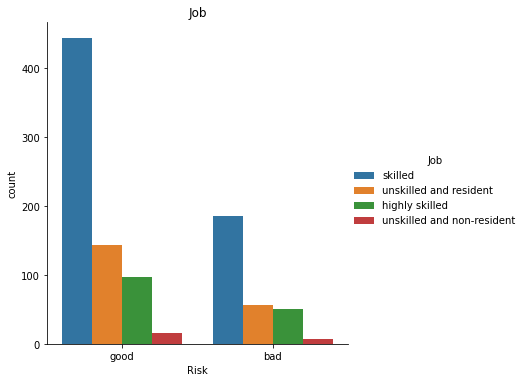

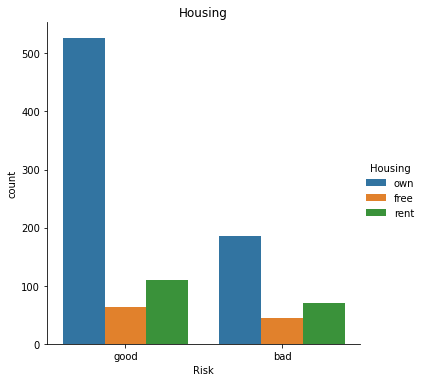

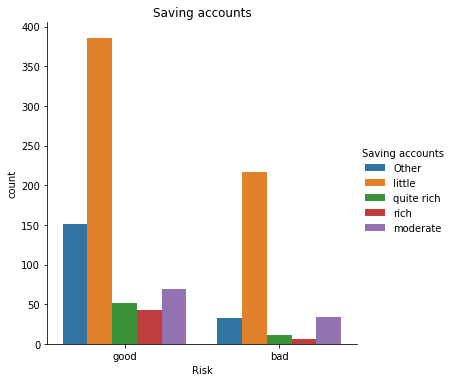

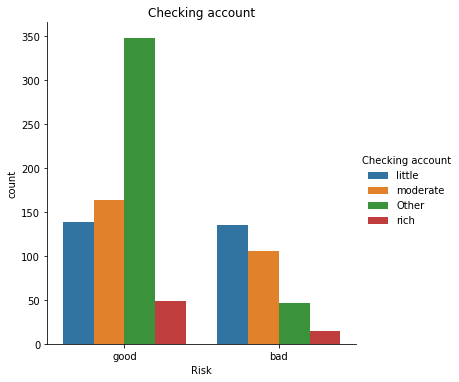

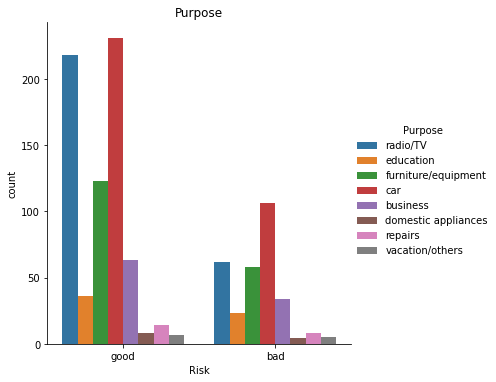

Sex affects risk status.
Job type affects risk status.
Housing affects risk status.
Saving accounts not obviously affect risk status.
Checking accounts not obviously affect risk status.
Purpose affects risk status.


In [6]:
# multivariate plot
sns.catplot(x='Risk', hue='Sex', data=df_data, kind='count').set(title='Sex')
plt.show()

sns.catplot(x='Risk', hue='Job', data=df_data, kind='count').set(title='Job')
plt.show()

sns.catplot(x='Risk', hue='Housing', data=df_data, kind='count').set(title='Housing')
plt.show()

sns.catplot(x='Risk', hue='Saving accounts', data=df_data, kind='count').set(title='Saving accounts')
plt.show()

sns.catplot(x='Risk', hue='Checking account', data=df_data, kind='count').set(title='Checking account')
plt.show()

sns.catplot(x='Risk', hue='Purpose', data=df_data, kind='count').set(title='Purpose')
plt.show()

print("Sex affects risk status.")
print("Job type affects risk status.")
print("Housing affects risk status.")
print("Saving accounts not obviously affect risk status.")
print("Checking accounts not obviously affect risk status.")
print("Purpose affects risk status.")



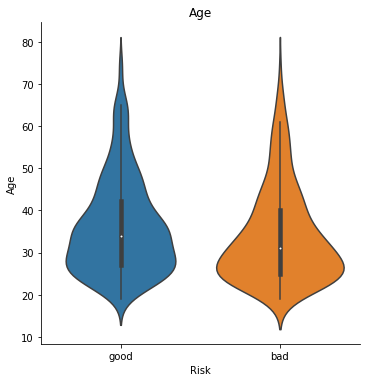

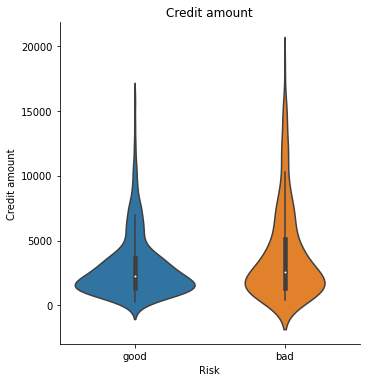

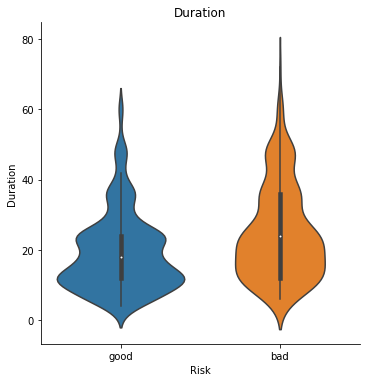

Age affects risk status.
Credit amount affects risk status.
Duration affects risk status.


In [7]:
sns.catplot(x='Risk', y='Age', data=df_data, kind='violin').set(title='Age')
plt.show()

sns.catplot(x='Risk', y='Credit amount', data=df_data, kind='violin').set(title='Credit amount')
plt.show()

sns.catplot(x='Risk', y='Duration', data=df_data, kind='violin').set(title='Duration')
plt.show()

print("Age affects risk status.")
print("Credit amount affects risk status.")
print("Duration affects risk status.")

### 1.5 Write the data out for the next step --- data_preprocessing

In [8]:
df_data.to_csv('df_data_clean.csv')